## importing key libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
df = pd.read_csv("D:/Academic Docs/Python&Machine learning/DSWP/datasets/Maternal Health Risk Data Set.csv")
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


## Basic variable assessments
Here we assess the variable to determine their basic features such as shape, column names, summary statistics, datatypes and possibility of missing values

In [3]:
df.shape

(1014, 7)

In [4]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

## Exploratory Data Analysis

### Missing values
It is extreme important to assess the presence of missing values in your data set as they influence the performance of your model. 
In our case, there were no missing values.

In [8]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

### Duplicates
Just like missing values, duplicates also influence the performance of our model.
In this case, the duplicates, surpassed the actual size of data that we have.

But we opted to eliminate them and work with a clean dataset.

In [9]:
#Duplicated value 
data_dup = df.duplicated().any()

print(data_dup)

True


In [10]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(452, 7)

In [13]:
#Duplicated value 
data_dup = df.duplicated().any()

print(data_dup)

False


In this section we manipulated the column names and the Body temperature column.

There was no problem in particular with the column name. I however choose to use the underscore to separate more than one word. 
This would make it easier when extracting strings.
Also changed is the column BS to Blood_Sugar

On the other hand, the temperature column was in Farenheit and converted it to degrees Celsius.(***This is personal preference***)

In [14]:
## Change column names
df.columns = ['Age', 'Systolic_BP', 'Diastolic_BP', 'Blood_Sugar', 'Body_Temp', 'Heart_Rate', 'Risk_level']

In [15]:
df.head()

,Age,Systolic_BP,Diastolic_BP,Blood_Sugar,Body_Temp,Heart_Rate,Risk_level
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [16]:
## Converting the temperature to degrees Celsius
df['Body_Temp'] = (df['Body_Temp'] - 32) / 1.8

In this section, our interest was to differentiate between categorical columns and Numerical columns.
Our assumptions is that a numerical column has more than 10 unique values.

In this case, both column ***Body Temp*** and ***Risk Level*** have less than 10 Unique values.
Body Temperature however is a numerical variable that doesn't vary much among humans that explain why most of the entries fall under the same bracket.

The risk level, which is our ***label*** has three unique values.
1. High risk
2. Mild risk
3. High risk

In [17]:
## Assessing categorical column
cat_cols = list()
num_cols = list()
for col in df.columns:
    if df[col].nunique() < 10:
        cat_cols.append(col)
    else:
        num_cols.append(col)
        
cat_cols

['Body_Temp', 'Risk_level']

In [18]:
df['Body_Temp'].value_counts()

36.666667    354
38.333333     41
38.888889     30
39.444444      9
37.777778      8
37.222222      8
36.888889      1
37.000000      1
Name: Body_Temp, dtype: int64

In [19]:
df['Risk_level'].value_counts()

low risk     234
high risk    112
mid risk     106
Name: Risk_level, dtype: int64

### Visualization

#### Univariate Analysis

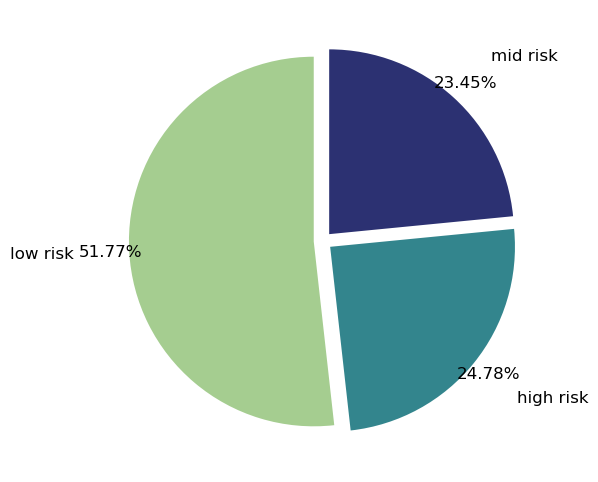

In [20]:
plt.figure(figsize=(9,6))

df['Risk_level'].value_counts().plot.pie(autopct="%1.2f%%",fontsize=12,startangle=90, cmap='crest',explode=[0.05] * 3,pctdistance=1.1,labeldistance=1.3,textprops={'fontsize': 15})
plt.ylabel("")
plt.show()

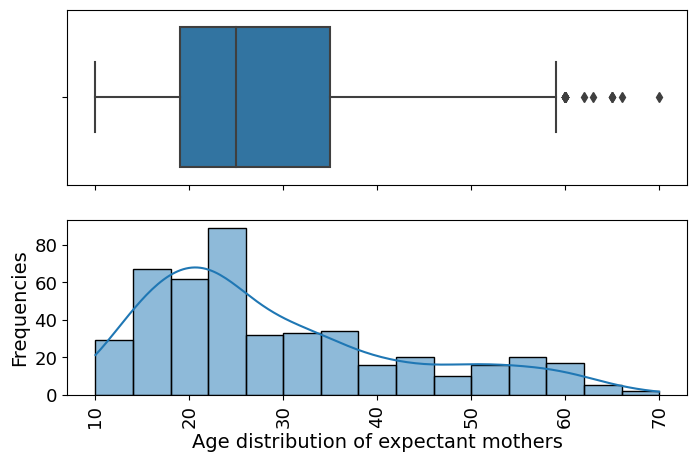

Age Descriptive Statistics
count    452.0
mean      29.0
std       14.0
min       10.0
25%       19.0
50%       25.0
75%       35.0
max       70.0
Name: Age, dtype: float64


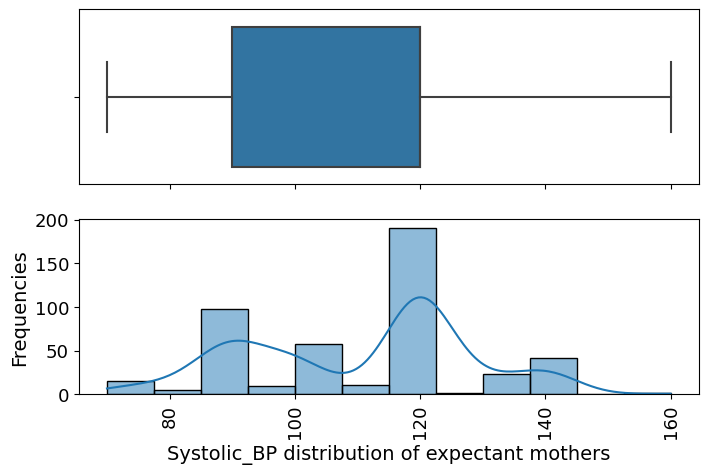

Systolic_BP Descriptive Statistics
count    452.0
mean     111.0
std       18.0
min       70.0
25%       90.0
50%      120.0
75%      120.0
max      160.0
Name: Systolic_BP, dtype: float64


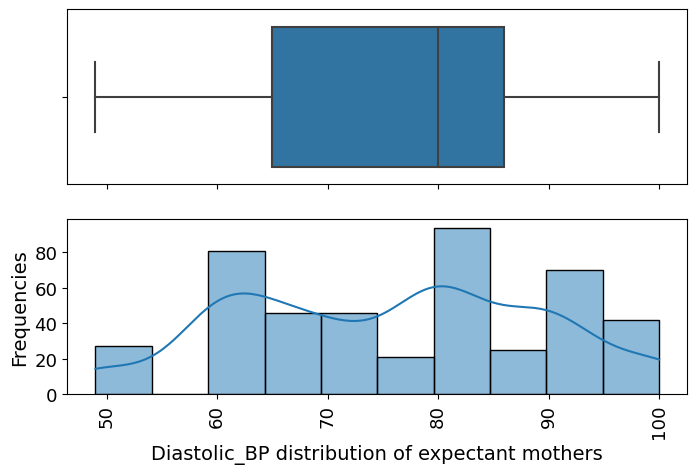

Diastolic_BP Descriptive Statistics
count    452.0
mean      75.0
std       14.0
min       49.0
25%       65.0
50%       80.0
75%       86.0
max      100.0
Name: Diastolic_BP, dtype: float64


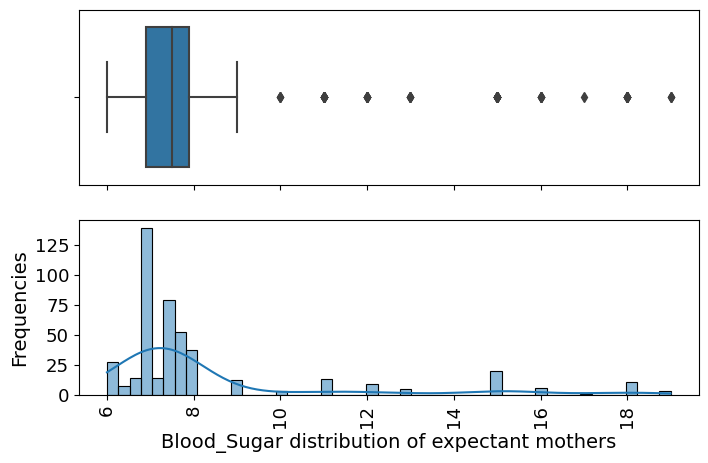

Blood_Sugar Descriptive Statistics
count    452.0
mean       8.0
std        3.0
min        6.0
25%        7.0
50%        8.0
75%        8.0
max       19.0
Name: Blood_Sugar, dtype: float64


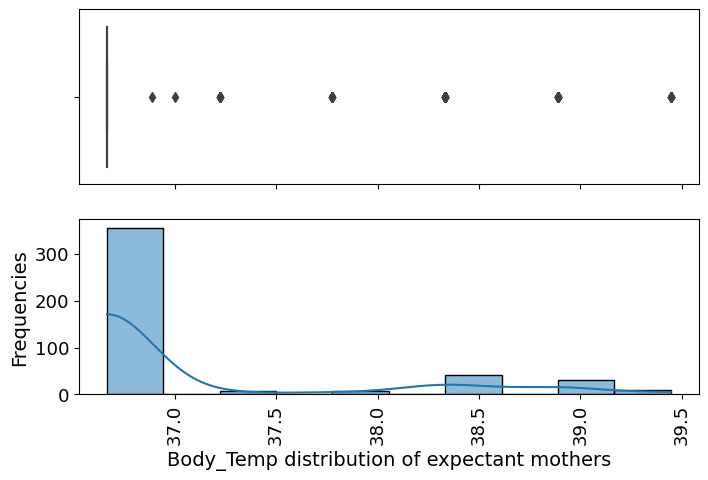

Body_Temp Descriptive Statistics
count    452.0
mean      37.0
std        1.0
min       37.0
25%       37.0
50%       37.0
75%       37.0
max       39.0
Name: Body_Temp, dtype: float64


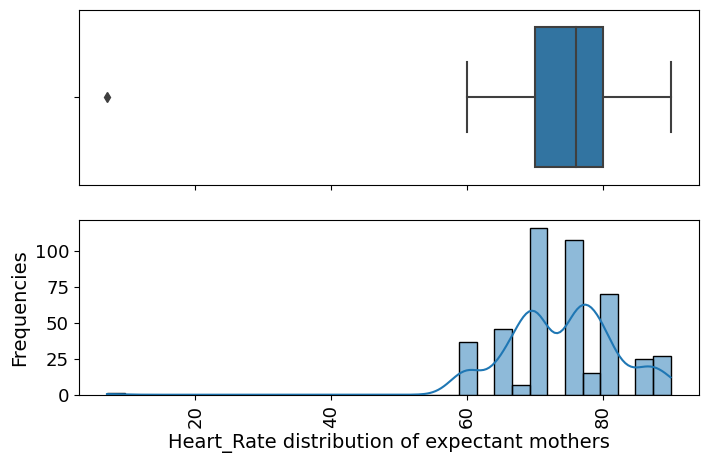

Heart_Rate Descriptive Statistics
count    452.0
mean      74.0
std        8.0
min        7.0
25%       70.0
50%       76.0
75%       80.0
max       90.0
Name: Heart_Rate, dtype: float64


In [21]:
for column in df.columns[:6]:  # Loop over all columns except 'Location'
    fig, (ax_box,ax_hist) = plt.subplots(2,sharex=True,figsize=(8,5))

    sns.boxplot(data=df,x=df[column],ax=ax_box)
    ax_box.set(xlabel="")
    sns.histplot(data=df,x=df[column],kde=True,ax=ax_hist)

    plt.xticks(fontsize=13,rotation=90)
    plt.xlabel("{} distribution of expectant mothers".format(column),fontsize=14)
    plt.yticks(fontsize=13)
    plt.ylabel("Frequencies",fontsize=14)
    plt.show()

    
    print('{} Descriptive Statistics'.format(column))
    print(df[column].describe().round())

In [22]:
df[df["Heart_Rate"] <= 50]

,Age,Systolic_BP,Diastolic_BP,Blood_Sugar,Body_Temp,Heart_Rate,Risk_level
499,16,120,75,7.9,36.666667,7,low risk


In [23]:
df[df["Age"] > 60]

,Age,Systolic_BP,Diastolic_BP,Blood_Sugar,Body_Temp,Heart_Rate,Risk_level
114,63,140,90,15.0,36.666667,90,high risk
313,62,120,80,6.9,36.666667,66,low risk
322,65,90,60,6.9,36.666667,70,low risk
326,66,85,60,6.9,36.666667,86,low risk
338,70,85,60,6.9,38.888889,70,low risk
339,65,120,90,6.9,39.444444,76,low risk
435,65,130,80,15.0,36.666667,86,high risk


In [24]:
df[df["Age"] > 55].value_counts()

Age  Systolic_BP  Diastolic_BP  Blood_Sugar  Body_Temp  Heart_Rate  Risk_level
56   120          80            13.0         36.666667  70          high risk     1
60   120          80            7.8          36.666667  75          high risk     1
66   85           60            6.9          36.666667  86          low risk      1
65   130          80            15.0         36.666667  86          high risk     1
     120          90            6.9          39.444444  76          low risk      1
     90           60            6.9          36.666667  70          low risk      1
63   140          90            15.0         36.666667  90          high risk     1
62   120          80            6.9          36.666667  66          low risk      1
60   140          90            12.0         36.666667  77          high risk     1
                  80            16.0         36.666667  66          high risk     1
     120          85            15.0         36.666667  60          mid risk     

#### Bivariate analysis

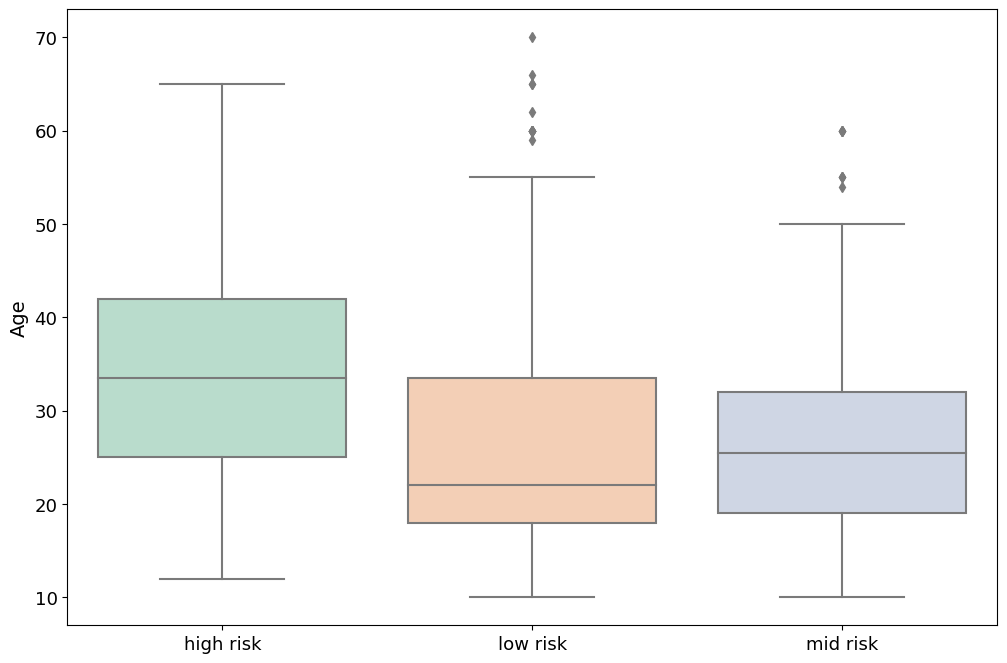

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Risk_level', y='Age', data=df, palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Age", fontsize=14)
plt.show()

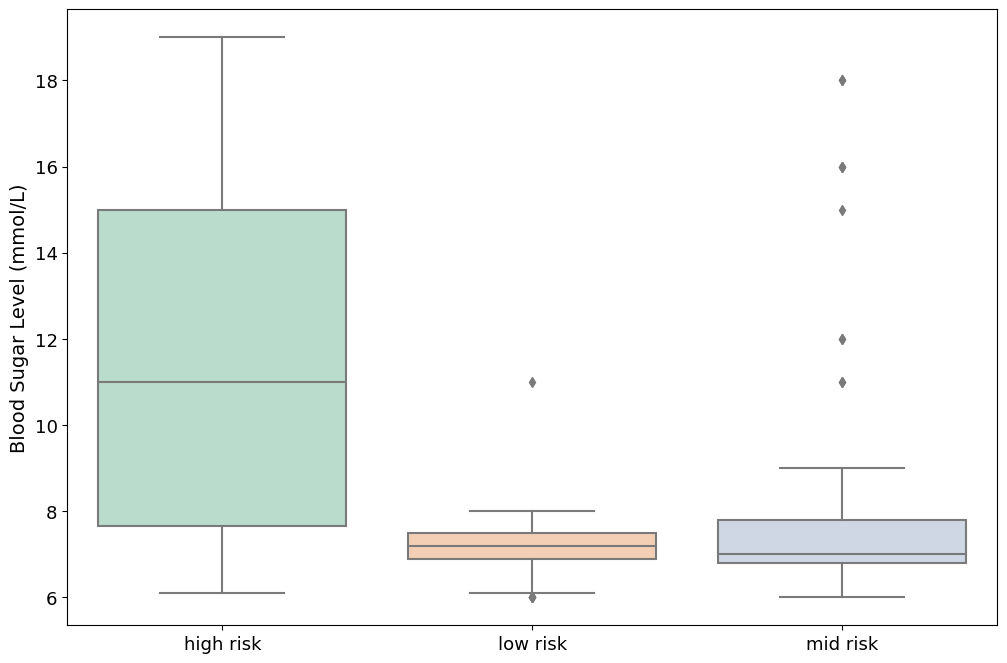

Blood Sugar Descriptive Statistics


count    452.0
mean       8.0
std        3.0
min        6.0
25%        7.0
50%        8.0
75%        8.0
max       19.0
Name: Blood_Sugar, dtype: float64

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Risk_level', y='Blood_Sugar', data=df, palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Blood Sugar Level (mmol/L)", fontsize=14)
plt.show()

print('Blood Sugar Descriptive Statistics')
df['Blood_Sugar'].describe().round()


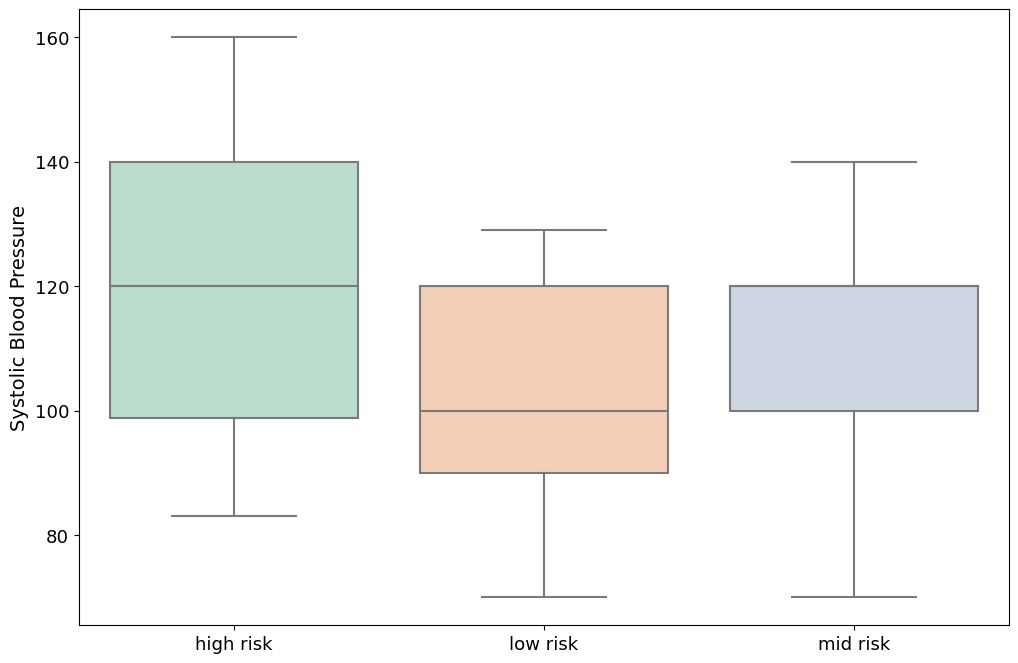

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Risk_level', y='Systolic_BP', data=df, palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Systolic Blood Pressure", fontsize=14)
plt.show()

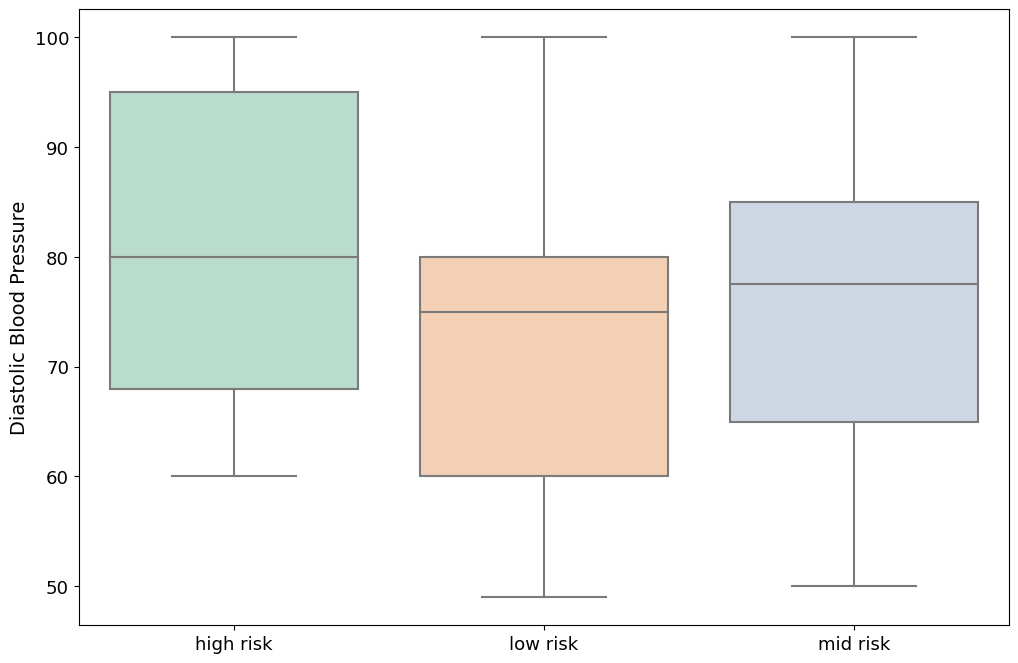

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Risk_level', y='Diastolic_BP', data=df, palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Diastolic Blood Pressure", fontsize=14)
plt.show()

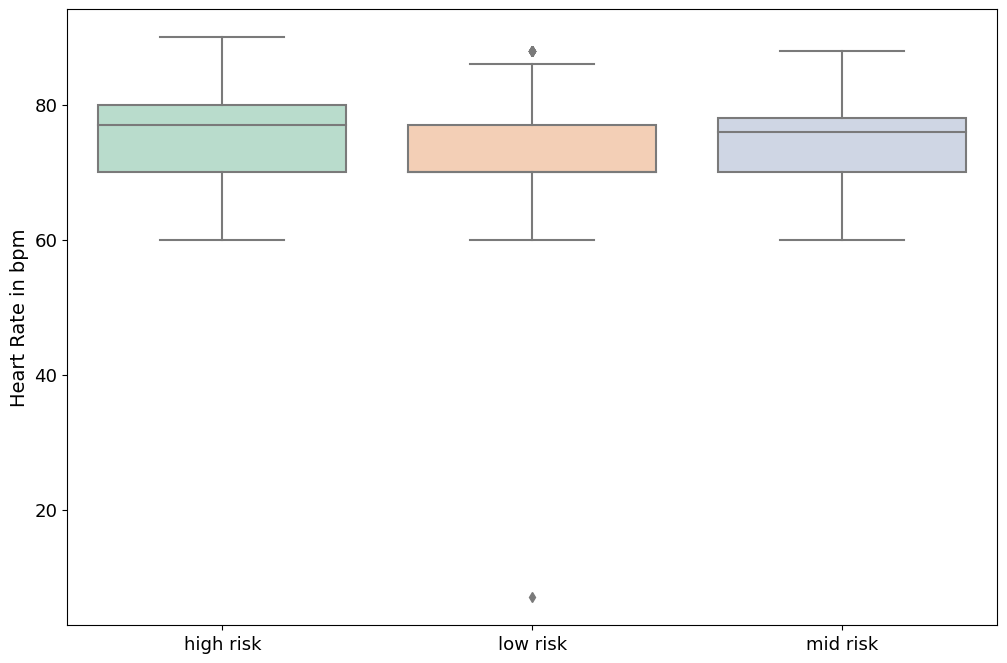

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Risk_level', y='Heart_Rate', data=df, palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Heart Rate in bpm", fontsize=14)
plt.show()

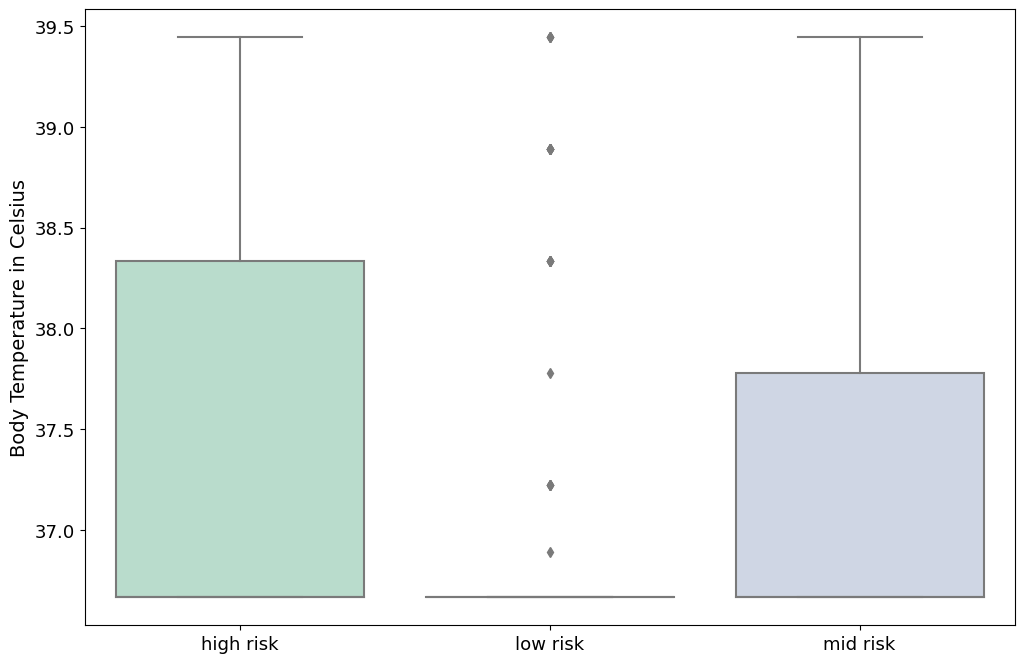

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Risk_level', y='Body_Temp', data=df, palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Body Temperature in Celsius", fontsize=14)
plt.show()

## Removing Outliers
From the EDA, we can easily conclude some variables have outliers that will cause skeweness in our model. These include the Heart rate and age column.
Possibilities of pregnancy at >60 years of age are highly unlikely.

Also, a bpm of 7 is highly unlikely.

It is alse evident that there is minimal correlation between ***risk level*** and ***Heart beat*** and ***Body temperature***

In [31]:
del df['Heart_Rate']
df.head()

,Age,Systolic_BP,Diastolic_BP,Blood_Sugar,Body_Temp,Risk_level
0,25,130,80,15.0,36.666667,high risk
1,35,140,90,13.0,36.666667,high risk
2,29,90,70,8.0,37.777778,high risk
3,30,140,85,7.0,36.666667,high risk
4,35,120,60,6.1,36.666667,low risk


In [32]:
df = df[df["Age"] <= 60]

In [33]:
df

,Age,Systolic_BP,Diastolic_BP,Blood_Sugar,Body_Temp,Risk_level
0,25,130,80,15.0,36.666667,high risk
1,35,140,90,13.0,36.666667,high risk
2,29,90,70,8.0,37.777778,high risk
3,30,140,85,7.0,36.666667,high risk
4,35,120,60,6.1,36.666667,low risk
...,...,...,...,...,...,...
673,12,100,50,6.4,36.666667,mid risk
674,15,100,60,6.0,36.666667,low risk
703,15,100,49,7.6,36.666667,low risk
704,12,100,50,6.0,36.666667,mid risk


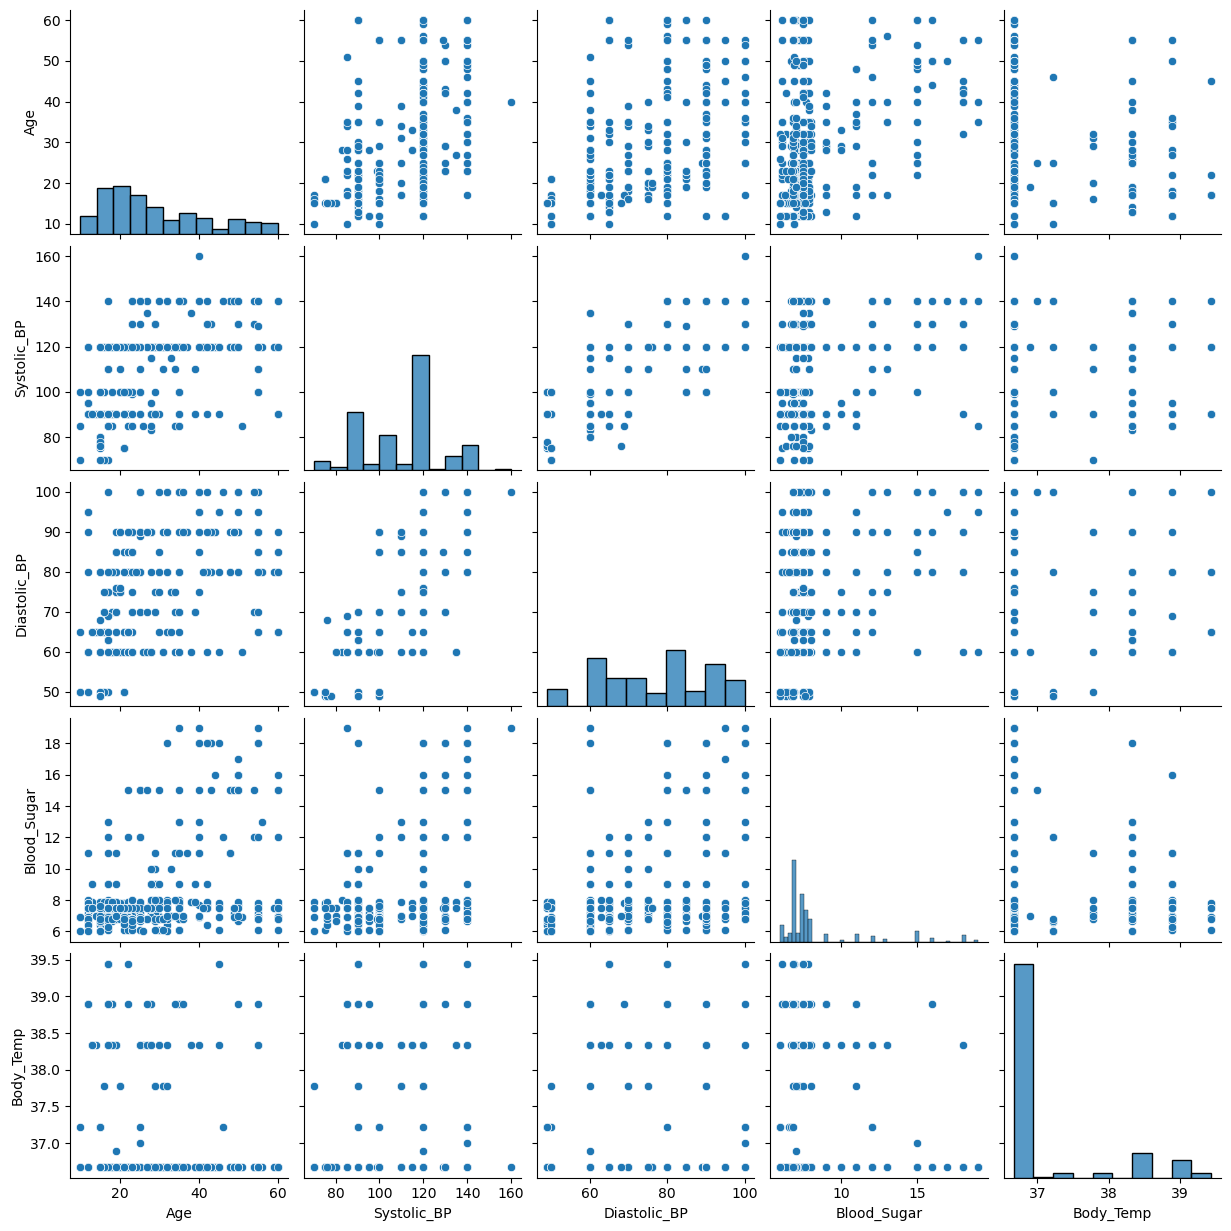

In [34]:
sns.pairplot(df)

## Model 

In [35]:
Y = df['Risk_level']

x = df.drop(columns=['Risk_level'], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)

X_test= ss.transform(X_test)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

Y_test = le.transform(Y_test)


In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model1  = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model1, X_train, Y_train, cv=cv, n_jobs=-1, scoring='accuracy')

result = np.mean(scores)
print('Training accuracy is: {} %'.format(100*result))

Training accuracy is: 66.58994708994712 %


In [41]:
model1.fit(X_train, Y_train)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Y_pred = model1.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.6741573033707865


In [42]:
print(classification_report(Y_pred, Y_test))
print('Test Accuracy: {} %'.format(100*accuracy_score(Y_pred, Y_test)))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.98      0.63      0.77        63
           2       0.08      0.67      0.15         3

    accuracy                           0.67        89
   macro avg       0.60      0.69      0.56        89
weighted avg       0.89      0.67      0.75        89

Accuracy: 67.41573033707866 %


In [43]:
from sklearn.tree import DecisionTreeClassifier
model2  = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model2, X_train, Y_train, cv=cv, n_jobs=-1, scoring='accuracy')

result = np.mean(scores)
print('Training accuracy is: {} %'.format(100*result))

Training accuracy is: 60.50000000000002 %


In [44]:
model2.fit(X_train, Y_train)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Y_pred = model2.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.6067415730337079


In [45]:
print(classification_report(Y_pred, Y_test))
print('Accuracy: {} %'.format(100*accuracy_score(Y_pred, Y_test)))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.73      0.70      0.71        43
           2       0.21      0.25      0.23        20

    accuracy                           0.61        89
   macro avg       0.58      0.56      0.57        89
weighted avg       0.63      0.61      0.62        89

Accuracy: 60.67415730337079 %


In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model3  = SVC()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model3, X_train, Y_train, cv=cv, n_jobs=-1, scoring='accuracy')

result = np.mean(scores)
print('Training accuracy is: {} %'.format(100*result))

Training accuracy is: 69.94179894179895 %


In [47]:
model3.fit(X_train, Y_train)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Y_pred = model3.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.7078651685393258


In [48]:
print(classification_report(Y_pred, Y_test))
print('Test Accuracy: {} %'.format(100*accuracy_score(Y_pred, Y_test)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.98      0.68      0.80        59
           2       0.00      0.00      0.00         0

    accuracy                           0.71        89
   macro avg       0.64      0.48      0.55        89
weighted avg       0.97      0.71      0.82        89

Accuracy: 70.78651685393258 %


c:\Users\KimKanyutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimKanyutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimKanyutu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model4  = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model4, X_train, Y_train, cv=cv, n_jobs=-1, scoring='accuracy')

result = np.mean(scores)
print('Training accuracy is: {} %'.format(100*result))

Training accuracy is: 64.8968253968254 %


In [50]:
model4.fit(X_train, Y_train)

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Y_pred = model4.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.6629213483146067


In [51]:
print(classification_report(Y_pred, Y_test))
print('Test Accuracy: {} %'.format(100*accuracy_score(Y_pred, Y_test)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.83      0.67      0.74        51
           2       0.21      0.38      0.27        13

    accuracy                           0.66        89
   macro avg       0.62      0.62      0.61        89
weighted avg       0.74      0.66      0.69        89

Accuracy: 66.29213483146067 %


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model4  = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model4, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [54]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [55]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 300}

In [56]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = classifier.predict(X_test)
print(classification_report(Y_pred, Y_test))
print('Test Accuracy: {} %'.format(100*accuracy_score(Y_pred, Y_test)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.85      0.70      0.77        50
           2       0.25      0.43      0.32        14

    accuracy                           0.69        89
   macro avg       0.65      0.64      0.63        89
weighted avg       0.75      0.69      0.71        89

Test Accuracy: 68.53932584269663 %


## Model deployment